### Homework 3.4 - Testing out filters

We are testing out the following filters:

- Low pass filter
- High pass filter
- Band filter
- Guassian blur filter

Pick an image of your choice and apply those filters on it.

**You must show all the steps clearly. Write your explanation in the markdown boxes.**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import fftpack
import math

Import the image and fft the image and shift in order for the image to be in the center

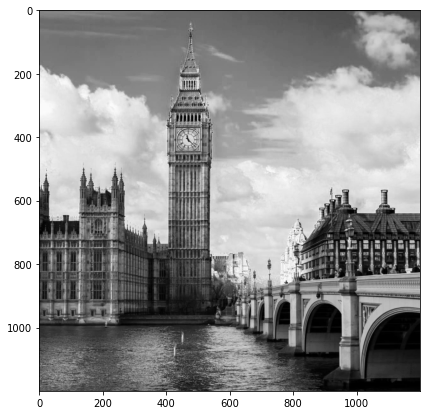

In [4]:
image = mpimg.imread('images/topic-london-gettyimages-760251843-promo.jpg')
gray_image = image[:,:,0]
norm = np.sqrt(gray_image.shape[0] * gray_image.shape[1])
n = 900
D1 = fftpack.fft2(gray_image)/norm 
D2 = fftpack.fftshift(D1)

D3 = fftpack.ifft2(D1)/n
def to_real(x):
    return np.abs(x)**0.05
plt. figure(figsize=(14,7))
plt.imshow(np.abs(D3), cmap='gray')

### Frequency-domain data

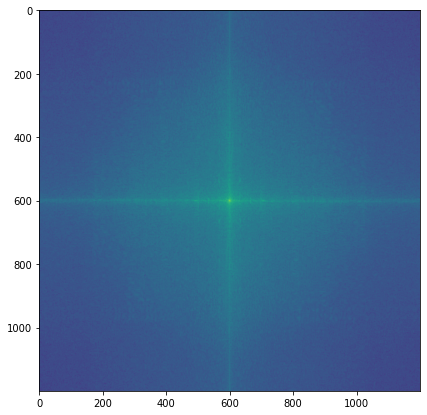

In [3]:
plt.figure(figsize=(14,7))
plt.imshow(to_real(D2))

Create the mask for Low Pass Filter to multiply with the fft data

In [4]:
n = 1200
Y, X = np.ogrid[:n, :n]
center = (int(n/2), int(n/2))
dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)
mask1 = dist_from_center <= 70

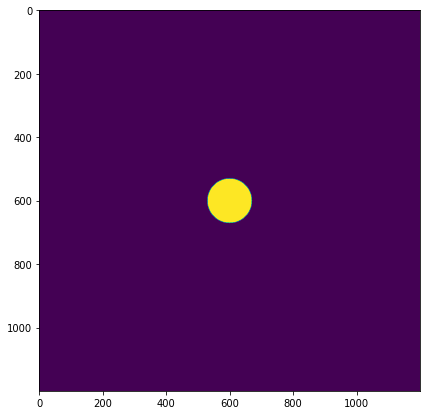

In [5]:
plt. figure(figsize=(14,7))
plt.imshow(mask1)

Data after multiplying with the mask

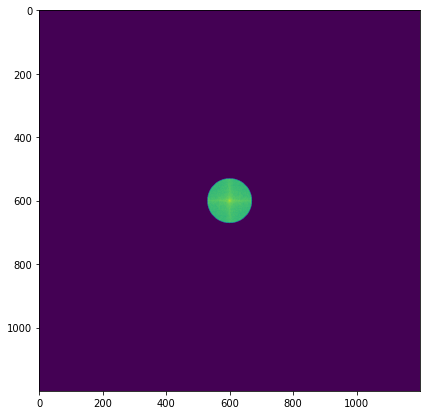

In [6]:
clean_freq1 = D2*mask1
plt. figure(figsize=(14,7))
plt.imshow(to_real(clean_freq1))

Invert the data back to time domain for Low Pass Filter

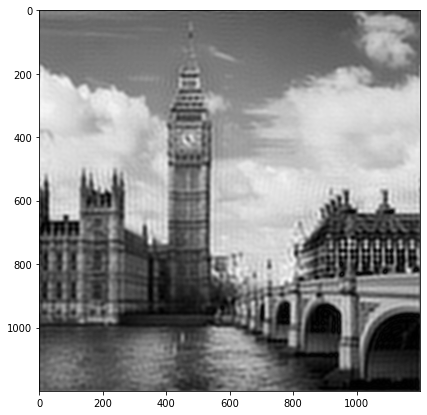

In [7]:
clean_img1 = fftpack.ifft2(clean_freq1)/norm
plt. figure(figsize=(14,7))
plt.imshow(np.abs(clean_img1), cmap='gray')

Create the mask for High Pass Filter to multiply with the fft data

In [8]:
Y, X = np.ogrid[:n, :n]
center = (int(n/2), int(n/2))
dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)
mask2 = dist_from_center > 70

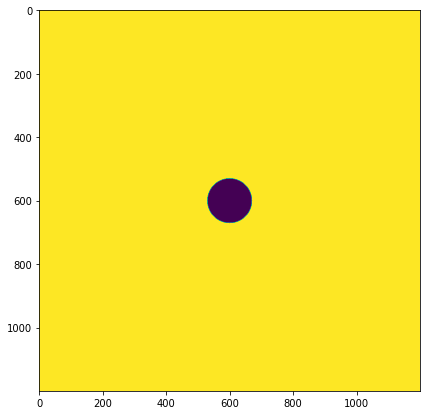

In [9]:
plt. figure(figsize=(14,7))
plt.imshow(mask2)

Data after multiplying with the mask

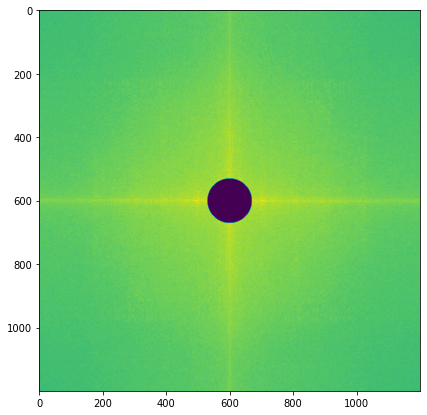

In [10]:
clean_freq2 = D2*mask2
plt. figure(figsize=(14,7))
plt.imshow(to_real(clean_freq2))

Invert the data back to time domain for High Pass Filter

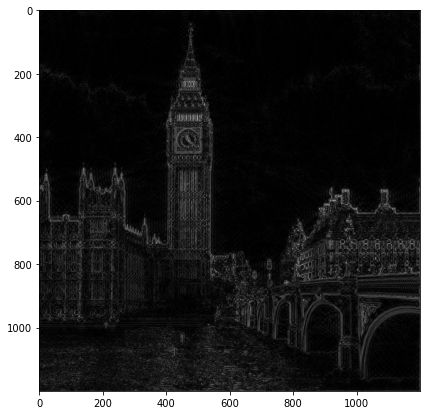

In [11]:
clean_img2 = fftpack.ifft2(clean_freq2)/norm
plt. figure(figsize=(14,7))
plt.imshow(np.abs(clean_img2), cmap='gray')

Create the mask for Band Filter to multiply with the fft data

In [12]:
Y, X = np.ogrid[:n, :n]
center = (int(n/2), int(n/2))
dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)
mask3 = (dist_from_center > 70)
mask4 = (dist_from_center < 450)
mask5 = mask3 & mask4

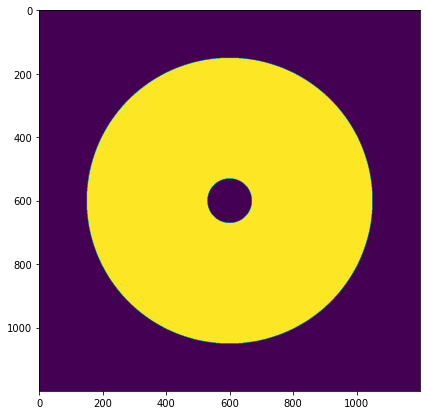

In [13]:
plt. figure(figsize=(14,7))
plt.imshow(mask5)

Data after multiplying with the mask

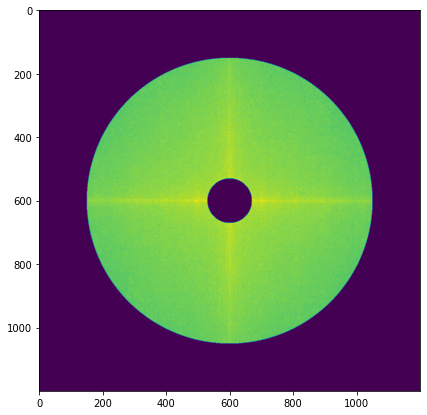

In [14]:
clean_freq3 = D2*mask5
plt. figure(figsize=(14,7))
plt.imshow(to_real(clean_freq3))

Invert the data back to time domain for Band Filter

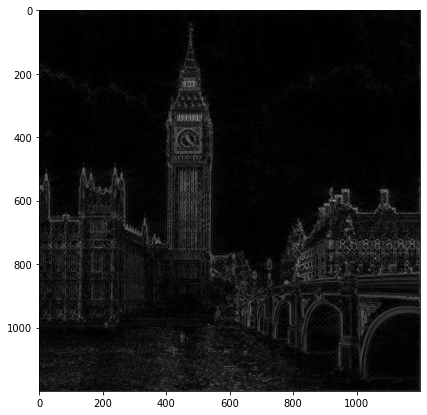

In [15]:
clean_img3 = fftpack.ifft2(clean_freq3)/norm
plt. figure(figsize=(14,7))
plt.imshow(np.abs(clean_img3), cmap='gray')

Create the mask for Gaussian Blur Filter to multiply with the fft data

In [5]:
variance = np.var(D2, axis=0)[1]

In [18]:
import scipy.stats as st

def gkern(kernlen=21, nsig=3):

    x = np.linspace(-nsig, nsig, kernlen+1)
    kern1d = np.diff(st.norm.cdf(x))
    kern2d = np.outer(kern1d, kern1d)
    return kern2d/kern2d.sum()

In [19]:
gaussian_mask = gkern(1200,variance)

Data after multiplying with the mask

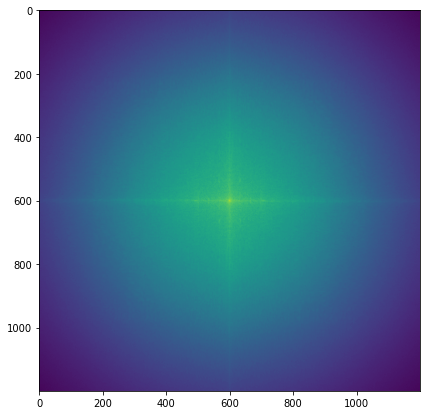

In [20]:
clean_freq4 = D2*gaussian_mask
plt. figure(figsize=(14,7))
plt.imshow(to_real(clean_freq4))

Invert the data back to time domain for Gaussian Blur Filter

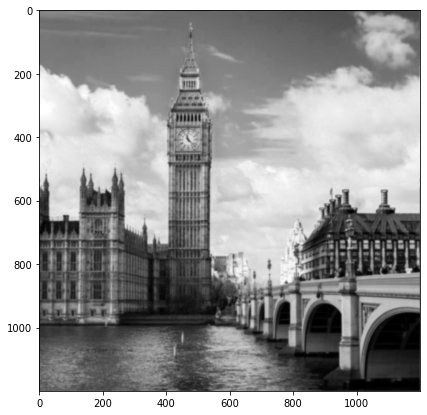

In [21]:
clean_img4 = fftpack.ifft2(clean_freq4)/norm
plt. figure(figsize=(14,7))
plt.imshow(np.abs(clean_img4), cmap='gray')